# Árboles de Decisión

Este notebook explica el algoritmo de Árboles de Decisión, uno de los algoritmos más intuitivos y versátiles en Machine Learning.

## ¿Qué es un Árbol de Decisión?

Un árbol de decisión es un modelo de aprendizaje supervisado que utiliza una estructura de árbol para tomar decisiones. Cada nodo interno representa una prueba sobre un atributo, cada rama representa el resultado de la prueba, y cada hoja (nodo terminal) representa una clase o valor.

## Ventajas y Desventajas

**Ventajas:**
- Fácil de entender e interpretar
- Requiere poca preparación de datos
- Puede manejar datos numéricos y categóricos
- No requiere normalización de datos

**Desventajas:**
- Puede sobreajustarse fácilmente (overfitting)
- Puede ser inestable (pequeños cambios en datos pueden generar árboles muy diferentes)
- Sesgo hacia características con más niveles


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seaborn es opcional, si no está instalado usamos matplotlib
try:
    import seaborn as sns
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False


## Conceptos Fundamentales

### 1. Entropía
La entropía mide la impureza o desorden en un conjunto de datos. Se calcula como:

$$H(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$

donde $p_i$ es la proporción de ejemplos de la clase $i$ en el conjunto $S$.

### 2. Ganancia de Información
La ganancia de información mide la reducción en entropía después de dividir un conjunto según un atributo:

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

### 3. Índice Gini
El índice Gini es otra medida de impureza:

$$Gini(S) = 1 - \sum_{i=1}^{c} p_i^2$$


In [2]:
# Ejemplo de cálculo de entropía
def entropia(y):
    """Calcula la entropía de un conjunto de etiquetas"""
    if len(y) == 0:
        return 0
    # Contar frecuencias de cada clase
    counts = np.bincount(y)
    # Calcular proporciones
    proportions = counts / len(y)
    # Eliminar ceros para evitar log(0)
    proportions = proportions[proportions > 0]
    # Calcular entropía
    return -np.sum(proportions * np.log2(proportions))

# Ejemplo de cálculo de índice Gini
def gini(y):
    """Calcula el índice Gini de un conjunto de etiquetas"""
    if len(y) == 0:
        return 0
    counts = np.bincount(y)
    proportions = counts / len(y)
    return 1 - np.sum(proportions ** 2)

# Ejemplo
y_ejemplo = np.array([0, 0, 0, 1, 1, 1, 1, 1])
print(f"Entropía: {entropia(y_ejemplo):.4f}")
print(f"Gini: {gini(y_ejemplo):.4f}")

# Conjunto más puro
y_puro = np.array([0, 0, 0, 0, 0, 0])
print(f"\nConjunto puro - Entropía: {entropia(y_puro):.4f}, Gini: {gini(y_puro):.4f}")

# Conjunto más impuro (50-50)
y_impuro = np.array([0, 0, 0, 1, 1, 1])
print(f"Conjunto impuro - Entropía: {entropia(y_impuro):.4f}, Gini: {gini(y_impuro):.4f}")


Entropía: 0.9544
Gini: 0.4688

Conjunto puro - Entropía: -0.0000, Gini: 0.0000
Conjunto impuro - Entropía: 1.0000, Gini: 0.5000


## Árbol de Decisión para Clasificación


In [3]:
# Cargar dataset de iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el árbol de decisión
dt_clf = DecisionTreeClassifier(
    criterion='gini',        # Criterio de división: 'gini' o 'entropy'
    max_depth=3,             # Profundidad máxima del árbol
    min_samples_split=2,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras en una hoja
    random_state=42
)

dt_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = dt_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Precisión: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



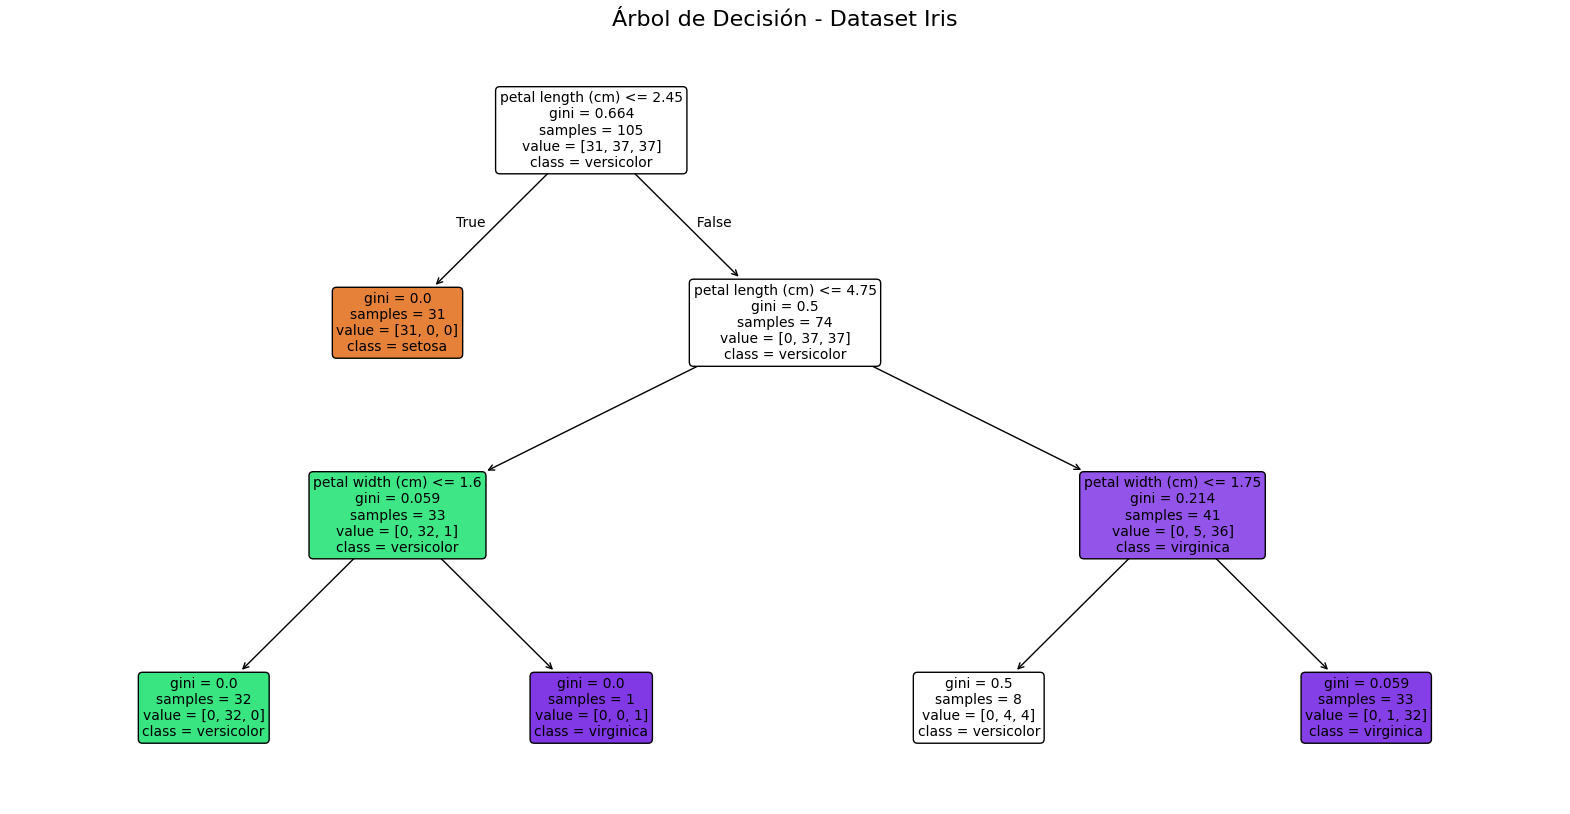

In [4]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión - Dataset Iris", fontsize=16)
plt.show()


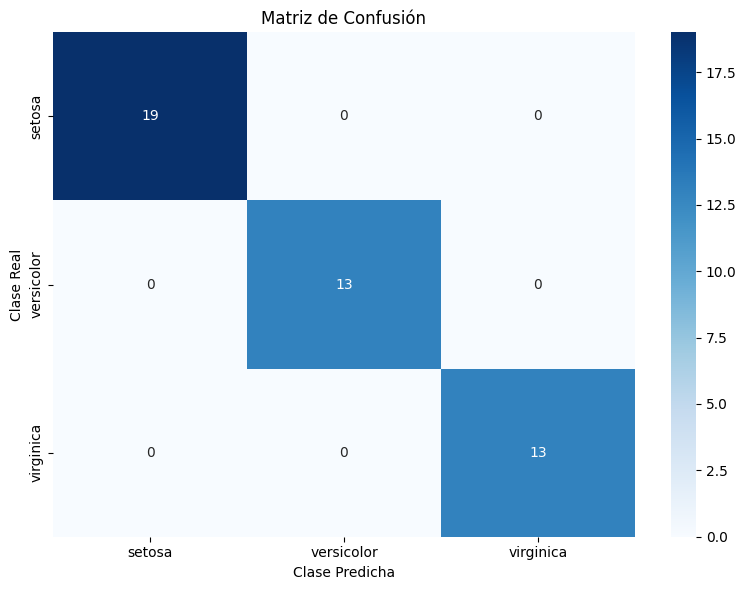

In [5]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

if HAS_SEABORN:
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
else:
    # Usar matplotlib si seaborn no está disponible
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names)
    plt.yticks(tick_marks, iris.target_names)
    # Añadir valores en las celdas
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()


## Árbol de Decisión para Regresión


In [6]:
# Cargar dataset de regresión
boston = datasets.fetch_california_housing()
X_reg, y_reg = boston.data, boston.target

# Dividir en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Crear y entrenar el árbol de decisión para regresión
dt_reg = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_reg.fit(X_train_reg, y_train_reg)

# Hacer predicciones
y_pred_reg = dt_reg.predict(X_test_reg)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MSE: 0.5211
RMSE: 0.7219
R²: 0.6030


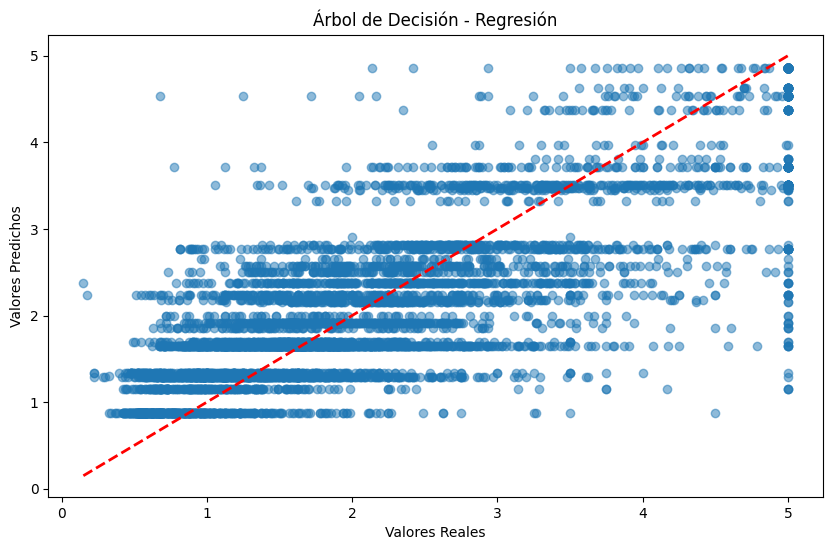

In [7]:
# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Árbol de Decisión - Regresión')
plt.show()


## Importancia de Características

Los árboles de decisión pueden mostrar qué características son más importantes para hacer predicciones.


Importancia de características:
      Característica  Importancia
2  petal length (cm)     0.925108
3   petal width (cm)     0.074892
1   sepal width (cm)     0.000000
0  sepal length (cm)     0.000000


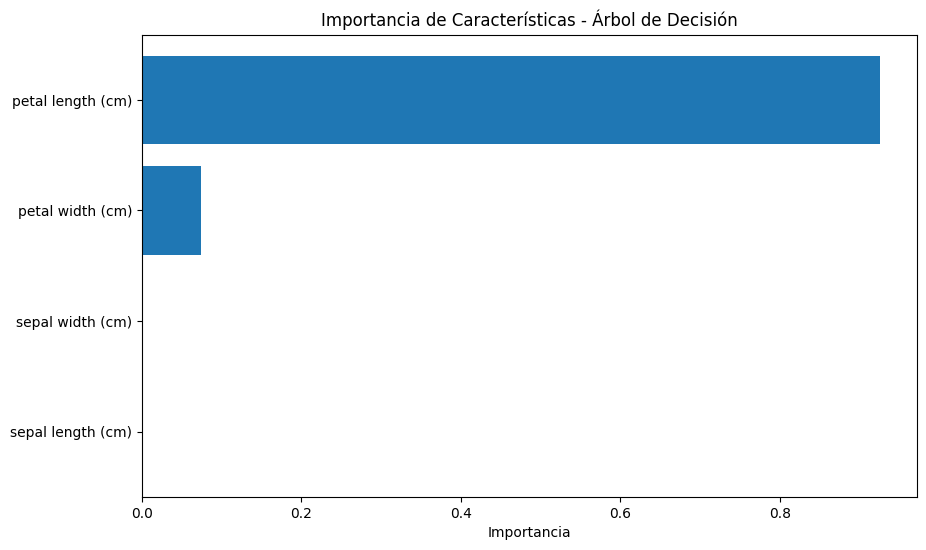

In [8]:
# Importancia de características en el árbol de clasificación
feature_importance = dt_clf.feature_importances_
feature_names = iris.feature_names

# Crear DataFrame para visualización
importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': feature_importance
}).sort_values('Importancia', ascending=False)

print("Importancia de características:")
print(importance_df)

# Visualizar importancia
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Características - Árbol de Decisión')
plt.gca().invert_yaxis()
plt.show()


## Control de Sobreajuste (Overfitting)

El sobreajuste ocurre cuando el árbol se ajusta demasiado a los datos de entrenamiento. Podemos controlarlo con varios parámetros:

- **max_depth**: Limita la profundidad máxima del árbol
- **min_samples_split**: Mínimo de muestras requeridas para dividir un nodo
- **min_samples_leaf**: Mínimo de muestras requeridas en una hoja
- **max_features**: Número máximo de características a considerar para dividir


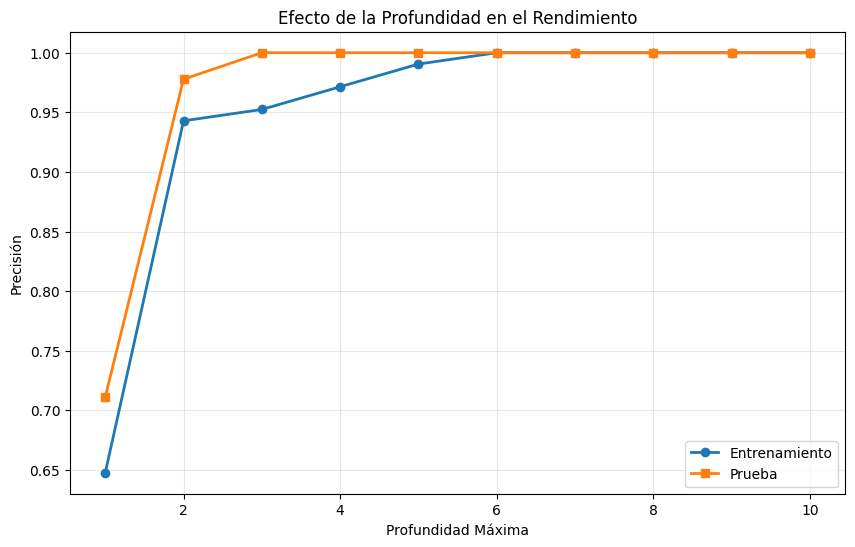

Podemos ver cómo el sobreajuste aumenta con la profundidad


In [9]:
# Comparar diferentes profundidades máximas
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Entrenamiento', linewidth=2)
plt.plot(depths, test_scores, 's-', label='Prueba', linewidth=2)
plt.xlabel('Profundidad Máxima')
plt.ylabel('Precisión')
plt.title('Efecto de la Profundidad en el Rendimiento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Podemos ver cómo el sobreajuste aumenta con la profundidad")


## Parámetros Importantes

### Criterio de División
- **'gini'**: Índice de Gini (por defecto, más rápido)
- **'entropy'**: Ganancia de información (puede ser más preciso)

### Parámetros de Regularización
- **max_depth**: Profundidad máxima (None = sin límite)
- **min_samples_split**: Mínimo de muestras para dividir (default: 2)
- **min_samples_leaf**: Mínimo de muestras en hoja (default: 1)
- **max_features**: Máximo de características a considerar (default: None = todas)
- **max_leaf_nodes**: Máximo número de hojas (None = sin límite)
